In [2]:
# import libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.cluster import KMeans, SpectralClustering
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV
# additional libraries used
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats

In [3]:
df = pd.read_csv("wine.csv")
df = df.replace(['good', 'bad'], [1,0]) #replace good,bad with 1,0

Attribute Information:
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality ('good' and 'bad' based on score >5 and <5)


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


<AxesSubplot:xlabel='residual sugar'>

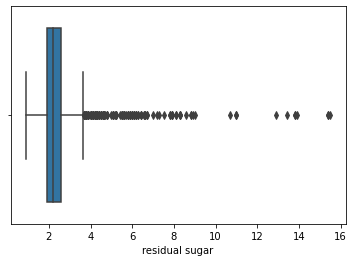

In [6]:
#box plot to check for outliers
import warnings #ignores needless warning
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

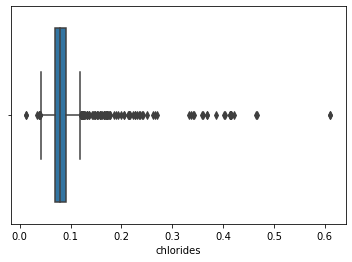

In [7]:
sns.boxplot(df['chlorides'])

There are outliers so I will blanked remove them from the dataframe.

In [8]:
df.shape

(1599, 12)

In [9]:
# z-score calculation for removing outliers from the dataframe
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(1458, 12)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

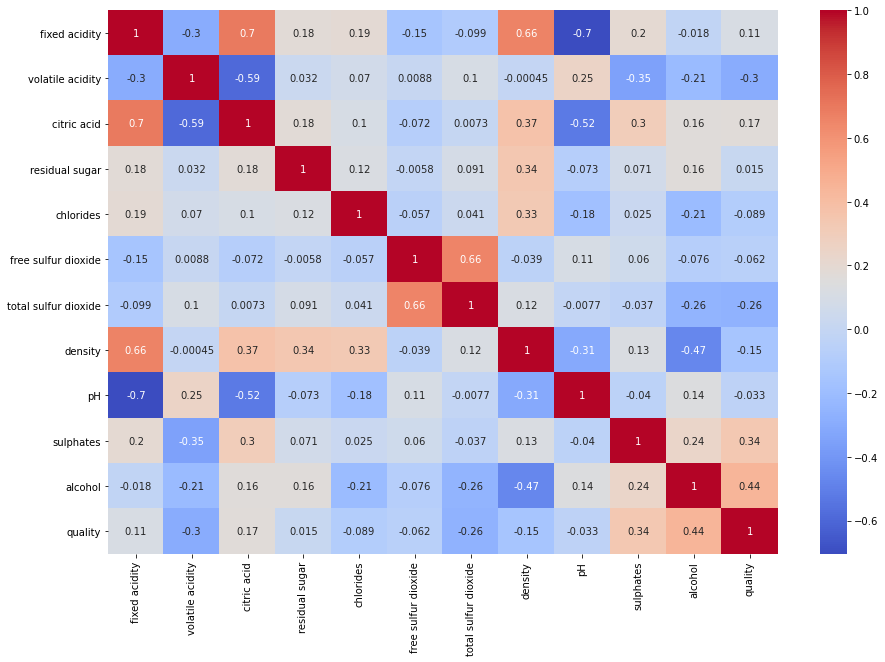

In [11]:
#Correlation Matrix for the features
plt.subplots(figsize=(15, 10)) 
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [12]:
df.groupby(["quality"]).mean().transpose() 

quality,0,1
fixed acidity,8.109538,8.485642
volatile acidity,0.578599,0.477541
citric acid,0.230089,0.295286
residual sugar,2.374590,2.400762
chlorides,0.083578,0.079785
free sulfur dioxide,15.710879,14.560356
total sulfur dioxide,51.910581,36.626429
density,0.996996,0.996481
pH,3.321177,3.311868
sulphates,0.595306,0.682579


In [13]:
# Needed to create the hex plots because some weren't a useable datatype
df.is_copy = False
df["fixed acidity"] = df["fixed acidity"].apply(lambda x: float(x))
df["volatile acidity"] = df["volatile acidity"].apply(lambda x: float(x))
df["citric acid"] = df["citric acid"].apply(lambda x: float(x))
df["residual sugar"] = df["residual sugar"].apply(lambda x: float(x))
df["chlorides"] = df["chlorides"].apply(lambda x: float(x))
df["free sulfur dioxide"] = df["free sulfur dioxide"].apply(lambda x: int(x))
df["total sulfur dioxide"] = df["total sulfur dioxide"].apply(lambda x: int(x))
df["density"] = df["density"].apply(lambda x: float(x))
df["pH"] = df["pH"].apply(lambda x: float(x))
df["sulphates"] = df["sulphates"].apply(lambda x: float(x))
df["alcohol"] = df["alcohol"].apply(lambda x: float(x))
df["quality"] = df["quality"].apply(lambda x: str(x))

In [14]:
df[df['quality'] == '0'].corr() #corr for bad

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.233123,0.654939,0.127480,0.197695,-0.054725,-0.005525,0.697299,-0.652758,0.105102,-0.103553
volatile acidity,-0.233123,1.000000,-0.537425,0.014362,0.009716,-0.101613,-0.063921,-0.124796,0.200729,-0.234885,0.006160
citric acid,0.654939,-0.537425,1.000000,0.154126,0.151295,0.072142,0.197910,0.460006,-0.445208,0.223900,-0.020049
residual sugar,0.127480,0.014362,0.154126,1.000000,0.066713,0.069606,0.165049,0.351296,-0.034958,0.078704,0.184525
chlorides,0.197695,0.009716,0.151295,0.066713,1.000000,0.007770,0.074949,0.311453,-0.201810,0.203421,-0.207783
free sulfur dioxide,-0.054725,-0.101613,0.072142,0.069606,0.007770,1.000000,0.678202,0.024652,0.000105,0.128091,-0.110781
total sulfur dioxide,-0.005525,-0.063921,0.197910,0.165049,0.074949,0.678202,1.000000,0.110231,-0.128943,0.113514,-0.205424
density,0.697299,-0.124796,0.460006,0.351296,0.311453,0.024652,0.110231,1.000000,-0.262436,0.230389,-0.350544
pH,-0.652758,0.200729,-0.445208,-0.034958,-0.201810,0.000105,-0.128943,-0.262436,1.000000,0.013908,0.278036
sulphates,0.105102,-0.234885,0.223900,0.078704,0.203421,0.128091,0.113514,0.230389,0.013908,1.000000,0.064446


In [15]:
df[df['quality'] == '1'].corr() #corr for good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.310000,0.721722,0.210273,0.201571,-0.208672,-0.157638,0.685628,-0.753984,0.219623,-0.064266
volatile acidity,-0.310000,1.000000,-0.600598,0.058726,0.072391,0.072036,0.158542,0.004774,0.303626,-0.313263,-0.156435
citric acid,0.721722,-0.600598,1.000000,0.197859,0.103558,-0.172695,-0.118091,0.377022,-0.590758,0.294600,0.166472
residual sugar,0.210273,0.058726,0.197859,1.000000,0.163864,-0.070956,0.016367,0.351020,-0.105759,0.063832,0.171445
chlorides,0.201571,0.072391,0.103558,0.163864,1.000000,-0.118108,-0.044695,0.327772,-0.177475,-0.036543,-0.183520
free sulfur dioxide,-0.208672,0.072036,-0.172695,-0.070956,-0.118108,1.000000,0.688055,-0.103552,0.206732,0.050795,-0.022390
total sulfur dioxide,-0.157638,0.158542,-0.118091,0.016367,-0.044695,0.688055,1.000000,0.059715,0.144412,-0.013773,-0.157208
density,0.685628,0.004774,0.377022,0.351020,0.327772,-0.103552,0.059715,1.000000,-0.366977,0.166386,-0.506128
pH,-0.753984,0.303626,-0.590758,-0.105759,-0.177475,0.206732,0.144412,-0.366977,1.000000,-0.066998,0.106675
sulphates,0.219623,-0.313263,0.294600,0.063832,-0.036543,0.050795,-0.013773,0.166386,-0.066998,1.000000,0.135339


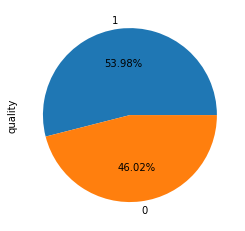

In [16]:
#Pie chart to get a better idea of the distribution between good and bad quality. As seen, it is mostly balanced. 
df['quality'].value_counts()
df['quality'].value_counts().plot.pie(autopct='%1.2f%%');

In [17]:
dfgood = df[df['quality'] == '1'] # df for good quality wine exclusively
dfbad = df[df['quality'] == '0'] # df for bad quality wine exclusively

<Figure size 432x288 with 0 Axes>

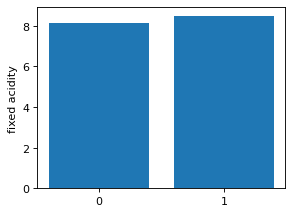

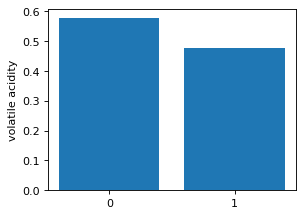

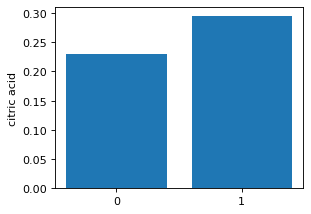

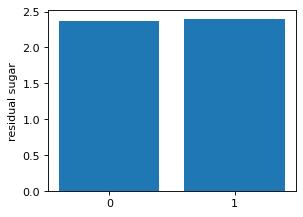

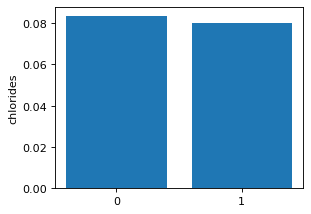

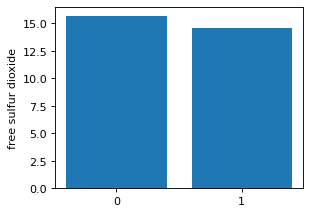

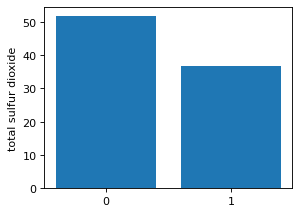

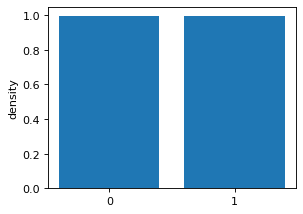

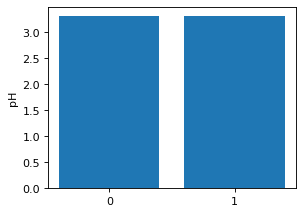

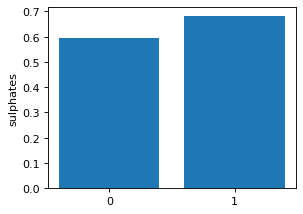

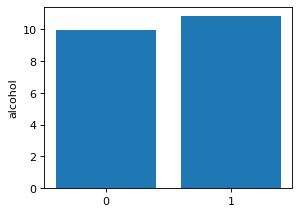

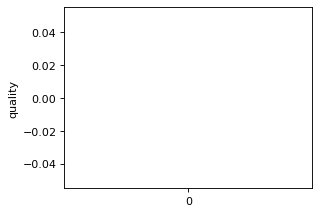

In [18]:
# Bar graphs of the features vs quality
plt.clf()
for var in list(df.columns):
    try:
        averages = []
        averages.append(df[df['quality'] == '0'][var].mean()) #good
        averages.append(df[df['quality'] == '1'][var].mean()) #bad
        plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
        plt.ylabel(var)
        plt.bar(["0","1"],averages)
        plt.show()
    except:
        print (var)

fixed acidity, residual sugar, chlorides, free sulfur dioxide, density, and pH don't seem to have an effect on quality and should be considered for removal

<Figure size 864x432 with 0 Axes>

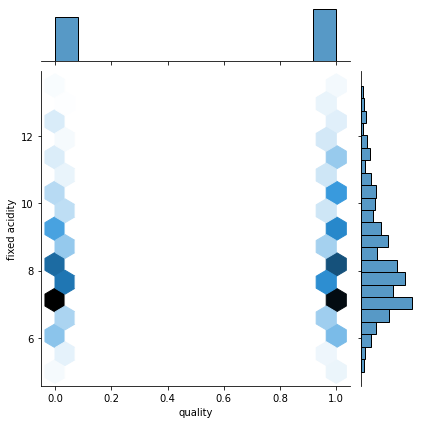

<Figure size 864x432 with 0 Axes>

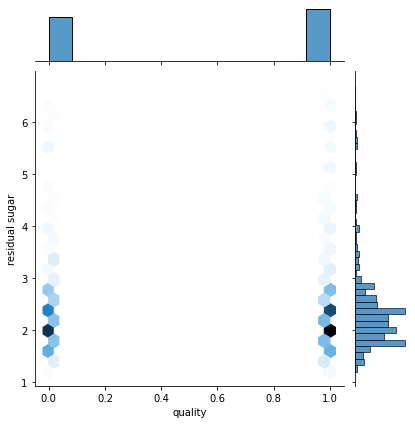

<Figure size 864x432 with 0 Axes>

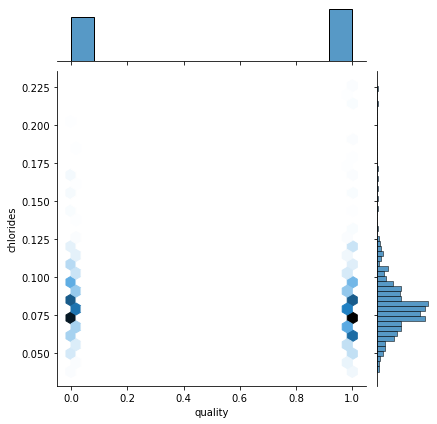

<Figure size 864x432 with 0 Axes>

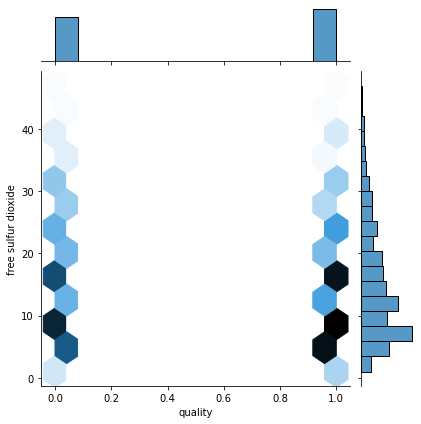

<Figure size 864x432 with 0 Axes>

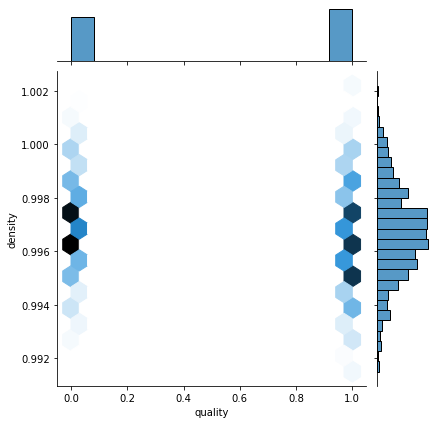

<Figure size 864x432 with 0 Axes>

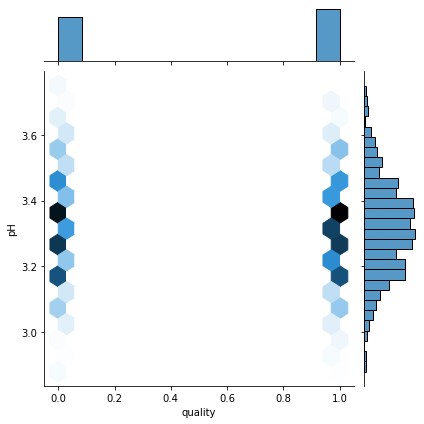

In [19]:
#Double check potential dropables using hexplots
df.is_copy = False
#total sulfur dioxide
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["fixed acidity"],x=df["quality"],kind="hex")
#TypeError: can't multiply sequence by non-int of type 'float'

#pH
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["residual sugar"],x=df["quality"],kind="hex")

#residual sugar
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["chlorides"],x=df["quality"],kind="hex")

#alcohol
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["free sulfur dioxide"],x=df["quality"],kind="hex")

#density
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["quality"],kind="hex")

#citric acid
df["quality"] = df["quality"].apply(lambda x: float(x)) #needed because "quality" was a non-int
plt.figure(figsize=(12,6))
sns.jointplot(y=df["pH"],x=df["quality"],kind="hex")

In [20]:
#Drops columns with corr close to 0 and little variance in the bar chart
features = df.columns.drop(['quality', 'fixed acidity', 'chlorides', 'free sulfur dioxide', 'density', 'residual sugar', 'pH' ])

In [21]:
#Displays a matrix of the features with the highest correlations
corr_features =[]

for i , r in df.corr().iterrows():  
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5: #only correlates values with r valus of 0.5 or greater
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['fixed acidity', 'citric acid', 0.6997465085687029],
 ['fixed acidity', 'density', 0.6604969854664455],
 ['citric acid', 'fixed acidity', 0.6997465085687029],
 ['free sulfur dioxide', 'total sulfur dioxide', 0.6603476787765864],
 ['total sulfur dioxide', 'free sulfur dioxide', 0.6603476787765864],
 ['density', 'fixed acidity', 0.6604969854664455]]

In [22]:
#define columns
columns = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

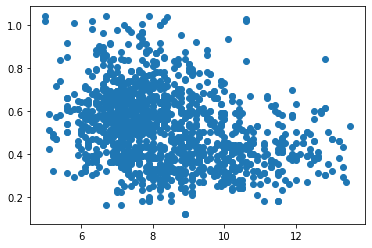

In [23]:
#Scatter plot
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

In [24]:
# min-max to scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[features].head()

,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol
0,0.630435,0.000000,0.201439,0.277108,0.192308
1,0.826087,0.000000,0.438849,0.421687,0.269231
2,0.695652,0.050633,0.345324,0.385542,0.269231
3,0.173913,0.708861,0.388489,0.301205,0.269231
4,0.630435,0.000000,0.201439,0.277108,0.192308


In [25]:
X, y = df[features], df["quality"] #define x and y

In [26]:
lenTrain, lenVal = 600, 200

In [27]:
X_train, X_val, X_test = X[:lenTrain], X[lenTrain:(lenTrain+lenVal)], X[(lenTrain+lenVal):]
y_train, y_val, y_test = y[:lenTrain], y[lenTrain:(lenTrain+lenVal)], y[(lenTrain+lenVal):]

In [28]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)

In [29]:
# KNN with gridsearch
gridKNN = GridSearchCV(
    estimator=knn, param_grid={'n_neighbors': [3, 5,7, 10, 15, 30], "weights": ["distance", "uniform"]}, 
    scoring="precision", refit = True, cv=5
)
gridKNN.fit(X_train,y_train)
KNNpredict=gridKNN.predict(X_test)

print (gridKNN.best_estimator_)
print (gridKNN.best_score_)

KNeighborsClassifier(n_neighbors=30)
0.7568658475665881


In [30]:
# SVC with gridsearch 
gridSVC = GridSearchCV(
    estimator=svm, param_grid={'C': [0.5,1,2]}, 
    scoring="precision", cv=5
)
gridSVC.fit(X_train, y_train)
print (gridSVC.best_estimator_)
print (gridSVC.best_score_)

SVC(C=0.5, random_state=42)
0.758755980861244


In [31]:
# Tree with gridsearch
gridTree = GridSearchCV(
    estimator=tree, param_grid={'max_depth': [None, 5, 10]}, 
    scoring="precision", cv=5
)
gridTree.fit(X_train, y_train)
print (gridTree.best_estimator_)
print (gridTree.best_score_)

DecisionTreeClassifier(random_state=42)
0.6871523307436183


In [32]:
#  Random Forest
gridRF = GridSearchCV(
    estimator=rf, param_grid={"n_estimators": [3, 5, 7, 10, 12, 15, 20, 30], 'max_depth': [None, 5, 10]}, 
    scoring="precision", cv=5
)
gridRF.fit(X_train, y_train)
print (gridRF.best_estimator_)
print (gridRF.best_score_)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)
0.7722982806667018


In [33]:
#  Adaboost Regressor
adaParams = {"base_estimator":[
    None, 
    DecisionTreeClassifier(max_depth=5)
], "n_estimators":[5, 10, 30, 50, 60], "learning_rate":[.5, 1.0, 1.5], "algorithm":["SAMME.R"]}
gridAda = GridSearchCV(
    estimator=ada, param_grid=adaParams,
    scoring="precision", cv=5
)
gridAda.fit(X_train, y_train)
print (gridAda.best_estimator_)
print (gridAda.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1.5, random_state=42)
0.7210396179472227


In [34]:
#  Bagging Regressor
bagParams = {"base_estimator":[
    None, 
    KNeighborsClassifier(n_neighbors=10, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=5, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=10, weights='distance'), 
    KNeighborsClassifier(n_neighbors=5, weights='distance'), 
    DecisionTreeClassifier(max_depth=5)
], "n_estimators":[5, 10, 30, 50, 60]}
gridBag = GridSearchCV(
    estimator=BaggingClassifier(random_state=42), param_grid=bagParams, 
    scoring="precision", cv=3
)
gridBag.fit(X_train, y_train)
print (gridBag.best_estimator_)
print (gridBag.best_score_)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),
                  n_estimators=5, random_state=42)
0.7222242677139584


RandomForest had the highest score of 0.772. I will use RF to demonstrate wine quality predictions. 

In [35]:
y_pred = gridRF.predict(X_test)
rfDF = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
rfDF 

,Actual,Predicted
888,1.0,0.0
890,0.0,1.0
891,0.0,0.0
892,1.0,1.0
893,0.0,0.0
...,...,...
1594,0.0,1.0
1595,1.0,1.0
1596,1.0,1.0
1597,0.0,1.0


In [36]:
print('Mean Absolute Error:', sm.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', sm.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(sm.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24468085106382978
Mean Squared Error: 0.24468085106382978
Root Mean Squared Error: 0.4946522526622413


The mean of 'quality' was 0.534709.

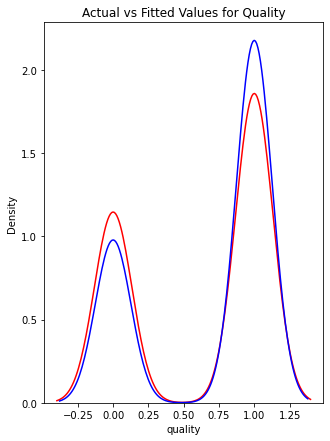

In [37]:
#Graph of actual vs predicted quality
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Quality')


plt.show()
plt.close()


**Unsupervised Learning**



In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.630435,0.000000,1.9,0.076,11,0.201439,0.9978,3.51,0.277108,0.192308,0.0
1,7.8,0.826087,0.000000,2.6,0.098,25,0.438849,0.9968,3.20,0.421687,0.269231,0.0
2,7.8,0.695652,0.050633,2.3,0.092,15,0.345324,0.9970,3.26,0.385542,0.269231,0.0
3,11.2,0.173913,0.708861,1.9,0.075,17,0.388489,0.9980,3.16,0.301205,0.269231,1.0
4,7.4,0.630435,0.000000,1.9,0.076,11,0.201439,0.9978,3.51,0.277108,0.192308,0.0


In [39]:
X = df.loc[:, 'fixed acidity':'alcohol'] # sets x to the features except quality
y = df['quality'] # sets y equal to quality

In [40]:
#Standard Scaler
scaler = preprocessing.StandardScaler().fit(X)
scaler
StandardScaler(copy=True, with_mean=True, with_std=True)
X_norm = scaler.transform(X) #or use scaler.fit_transform(x) #fit.transform scalar to X


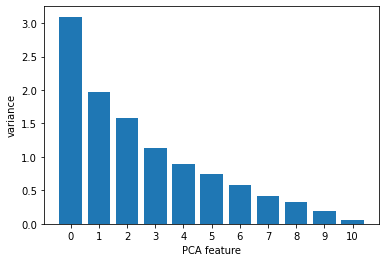

In [41]:
# PCA 
pca = PCA()
results = pca.fit(X_norm) # applies PCA on predictor variables
Z = results.transform(X) # array of possible variables 
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [42]:
# Dimension Reduction
pca = PCA(n_components = 3) #Creates PCA model with # either 2 or 4 
pca.fit(X_norm) #Fit PCA instance to scaled samples
pca_features = pca.fit_transform(X_norm)
print(pca_features.shape)

(1458, 3)


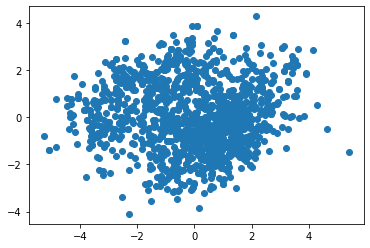

In [43]:
plt.scatter(pca_features[:, 0], pca_features[:, 1]) #scatter plot of values in column 0 vs values in col 1

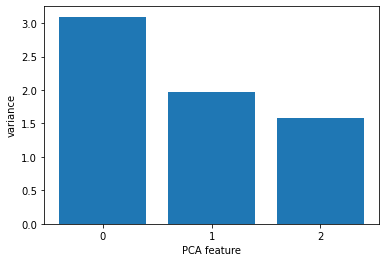

In [44]:
#fit pca to x
pca.fit(X_norm)

#plot variances
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [45]:
#Build KMeans model
model = KMeans(n_clusters=2)
model.fit(X_norm)
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# crosstab comparison
model = KMeans(n_clusters=2)
labels = model.fit_predict(pca_features)

ct = pd.crosstab(['labels'], df['quality'])
print(ct)

quality  0.0  1.0
row_0            
labels   671  787


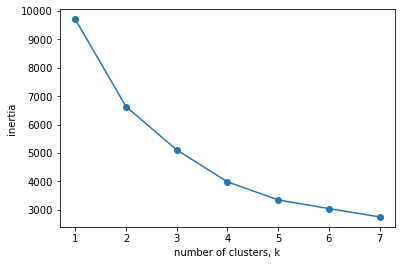

In [47]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [48]:
# 3 or 4 clusters seems to be the optimal number.

Now for a demonstration

In [49]:
#Create DataFrame for mean wine.
dict_a = {'volatile acidity':[0.527821],
         'citric acid':[0.270976],
         'total sulfur dioxide':[46.467792],
         'sulphates':[0.658149],
         'alcohol':[10.422983]}
df_a = pd.DataFrame(dict_a)

In [50]:
a_pred = gridRF.predict(df_a)
print(a_pred)

[1.]


Unsupervised Prediction

In [51]:
dict_b = {'fixed acidity':[8.319637],         
         'volatile acidity':[0.527821],
         'citric acid':[0.270976],
         'residual sugar':[2.538806],
         'chlorides':[0.087467],
         'free sulfur dioxide':[15.874922],
         'total sulfur dioxide':[46.467792],
         'density':[0.996747],
         'pH':[3.311113],
         'sulphates':[0.658149],
         'alcohol':[10.422983]}
df_b = pd.DataFrame(dict_a)

In [52]:
KMeansPred = model.predict(df_a)
print(KMeansPred)

ValueError: Incorrect number of features. Got 5 features, expected 3.